# Linearly Seperable Data.

<img align="center" width="500" height="500" src="linearly_sep.png">
  
  In a linearly sepearable dataset the exists a linear function that displaces all points of reference in the observable frame. Each point can be described  in reference to the line. The distance to the line can be elucidated via the distance formula. Also of note is that where ever a point falls in reference to the line, points on that side of the line usually can be found to have charactristics similar to each other. 
  Also of not is that the function that defines that line can be learned, approximated by computation. 
 as it is a line it is usually of the form 
 
 $ x_{2} = mx_{1} + b$ : function of a line
 
 b is the intercept with the with $x_{2}$ and m is the slope. 
 
 $x_{1} and x_{2}$ are not always elements of a 2-dimensional space. 
 
 
 
 

In [2]:
using Plots

In [3]:
function make_random_linearSeparable_data(n, ϵ)
    w = rand(2)                             # creates random two element array
    w[2] = w[2]/5                           # takes the second element and divides by 5 and assigns it to w[2]
    Data = rand(n,2)                        # creates 2 element arrays with n rows
    Data = [(Data[i,1], Data[i,2]) for i = 1:n     
            if abs(Data[i,2] - w[1]*Data[i,1] - w[2]) > ϵ]
    Y = [Data[i][2] > w[1]*Data[i][1] + w[2] ? 1 : -1 for i = 1:size(Data)[1]]        
    
            
    return Data, Y, w
end

make_random_linearSeparable_data (generic function with 1 method)

In [4]:
D, Y, coeff = make_random_linearSeparable_data(50, 0.02)    # input n = 50 and epsilon = 0.02 to make tuples

(Tuple{Float64,Float64}[(0.607669, 0.292877), (0.319629, 0.849532), (0.136746, 0.732861), (0.866908, 0.0652093), (0.286475, 0.0369096), (0.371197, 0.297119), (0.988907, 0.872233), (0.586258, 0.535096), (0.530026, 0.541461), (0.265339, 0.680834)  …  (0.346231, 0.589137), (0.799124, 0.619658), (0.0155953, 0.495481), (0.825652, 0.976656), (0.917512, 0.977578), (0.882009, 0.0243698), (0.573613, 0.267471), (0.984043, 0.609461), (0.288423, 0.510054), (0.332973, 0.996568)], [1, 1, 1, -1, -1, 1, 1, 1, 1, 1  …  1, 1, 1, 1, 1, -1, 1, 1, 1, 1], [0.171389, 0.0612447])

The tuples created at random are scattered and the pattern of the two groups is only visible by the (L) line that separates the two groups.

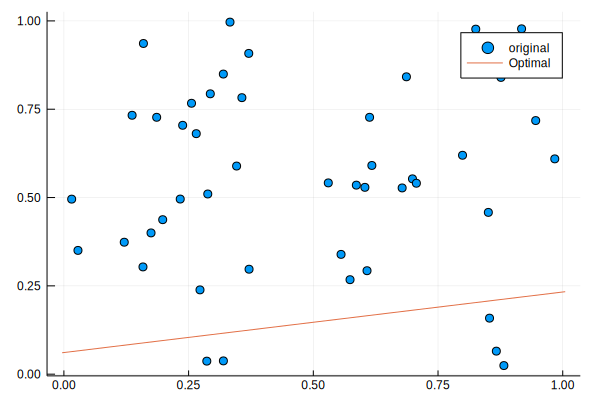

In [5]:
scatter(D, label = "original")
plot!(x -> coeff[1]*x + coeff[2], label = "Optimal")

The Perceptron model is used to define separable data and repeated multiple times.

In [6]:
function perceptron(data, labels, w)
        
    # Define hypothesis function 
    h(x) = w'*[1.0, x[1], x[2]] < 0 ? -1 : 1
    
    for i = 1:size(data)[1]
        if h(data[i]) != labels[i]
            w += labels[i]*[1.0, data[i][1], data[i][2]]
        end
    end
    return w
end

perceptron (generic function with 1 method)

In [7]:
w = perceptron(D, Y, rand(3));

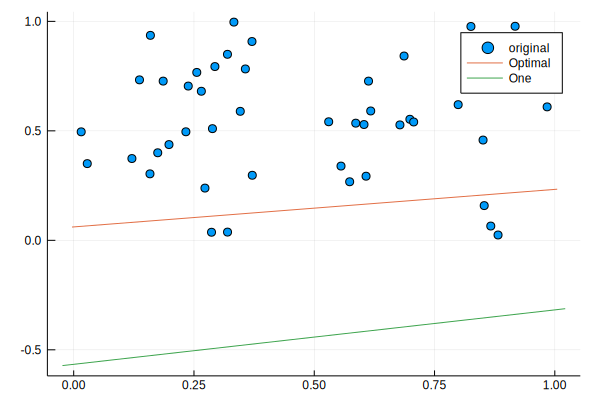

In [8]:
plot!(x -> (-w[1]-w[2]*x)/w[3], label = "One")

In [9]:
w = perceptron(D, Y, w);

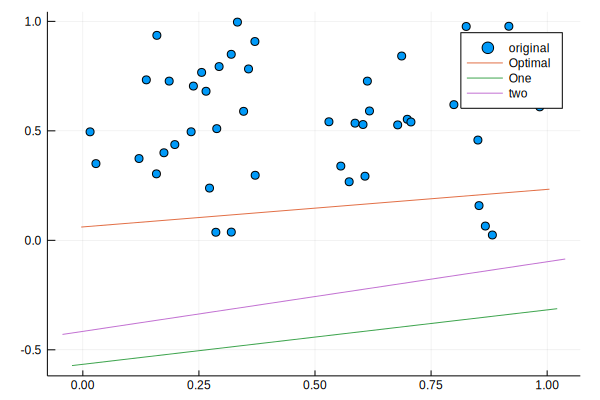

In [10]:
plot!(x -> (-w[1]-w[2]*x)/w[3],label="two")

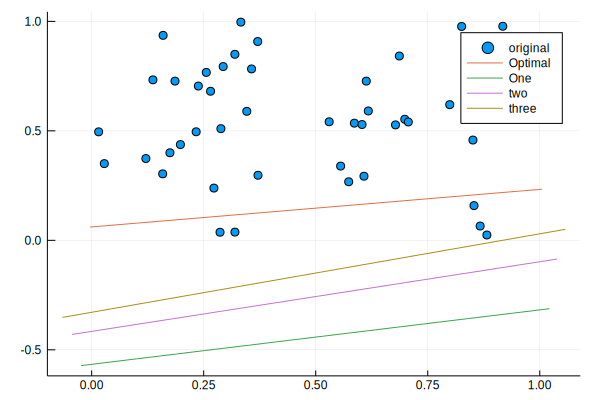

In [11]:
w = perceptron(D, Y, w)
plot!(x -> (-w[1]-w[2]*x)/w[3], label="three")

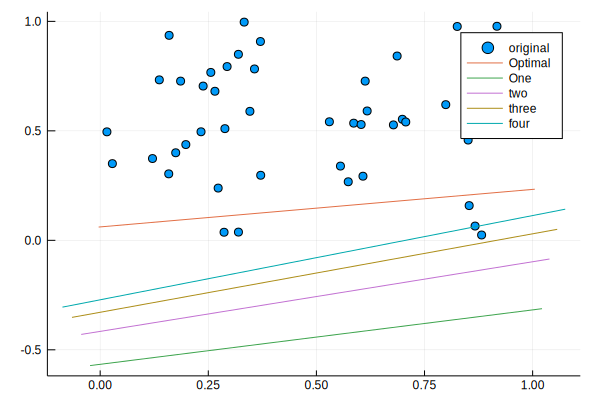

In [12]:
w = perceptron(D, Y, w)
plot!(x -> (-w[1]-w[2]*x)/w[3], label="four")

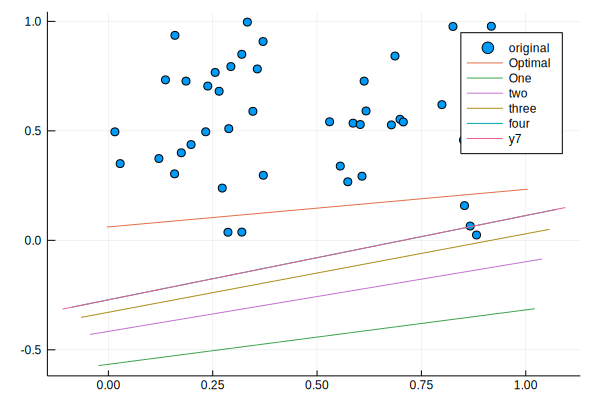

In [13]:
plot!(x -> (-w[1]-w[2]*x)/w[3])

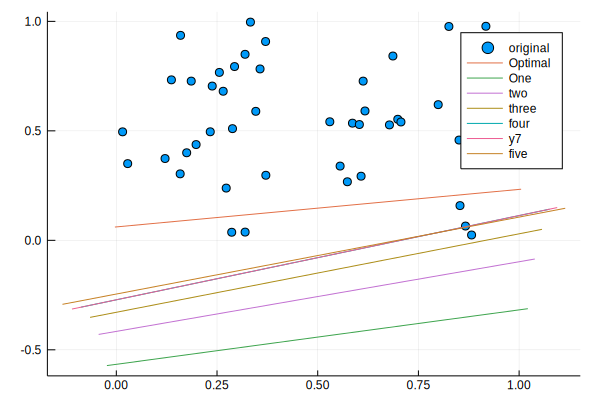

In [14]:
w = perceptron(D, Y, w)
plot!(x -> (-w[1]-w[2]*x)/w[3], label="five")

Comparison of the target function and approximated function.

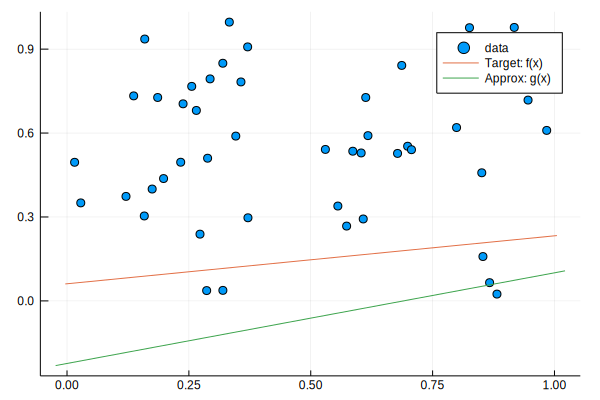

In [15]:
w = perceptron(D, Y, w)
scatter(D, label = "data")
plot!(x -> coeff[1]*x + coeff[2], label = "Target: f(x)")
plot!(x -> (-w[1]-w[2]*x)/w[3], label="Approx: g(x)")